In [20]:
import scipy
from sympy import *
import numpy as np
fac = np.math.factorial
init_printing()

In [21]:
import matplotlib.pyplot as plt

In [22]:
def coefficient(n,v):
    return int(fac(n)/(fac(v)*fac(n-v)))

In [32]:
def get_Bernstein_poly(n,v):
    r"""Grab Bernstein Polynomials for given n and v
    
    
    .. math:: B_{n,v}(x) = \mathcal{C_{n,v}}x^{v}(1-x)^{n-v}\\ mathcal{C_{n,v}} = \frac{n!}{v!(n-v)!}
        
    𝐵𝑛,𝑣(𝑥)=(𝑛𝑣)𝑥^(𝑣)(1−𝑥)^(𝑛−𝑣)
    (𝑛𝑣)=𝑛!/(𝑣!(𝑛−𝑣)!)
     
    
    Perameters
    ----------
    n : int
        n for Bernstein
    v : int
        v for Bernstein
    
    Returns
    -----
    poly_n_v : sympy.core.mul.Mul
        polynomial for givwn n and v values
    
    
    """
    x = symbols("x")
    coeff = coefficient(n,v)
    poly = (x**v)*(1-x)**(n-v)
    poly_n_v = coeff*poly

    return poly_n_v

In [31]:
get_Bernstein_poly?

In [34]:
# get_Bernstein_poly(n,v)
poly_n_v = get_Bernstein_poly(3,2)
poly_n_v

#### Remember that for <em><strong>given n = [0,1,2,3] values</strong></em>, there will be available v=0,..,n for each n
So for (n=0,1,2,3) 

n=0, v=0 (1 poly)

n=1, v=0 or v=1 (2 polys)

n=2, v=0 or v=1 or v=2 (3 polys)

n=1, v=0 or v=1 or v=2 or v=3 (4 polys)

10 total polynomials. You will need 10 subplots

In [38]:

#num = 9
v_values = []
n_values = [0,1,2,3]
for i in n_values:
    v_n = []
    for j in range(i+1):
        v_n.append(j)
    v_values.append(v_n)
print(f"nested list: {v_values}")

# Finds the max number of polynomials:
num_polys = 0
for vs_per_n in v_values:
    print(f"avail v's for n={len(vs_per_n)-1} {vs_per_n}")
    
    for sblst in range(len(vs_per_n)):
        num_polys+=vs_per_n[sblst]
          

print(f"Total number of polynomials: {num_polys}")

nested list: [[0], [0, 1], [0, 1, 2], [0, 1, 2, 3]]
avail v's for n=0 [0]
avail v's for n=1 [0, 1]
avail v's for n=2 [0, 1, 2]
avail v's for n=3 [0, 1, 2, 3]
Total number of polynomials: 10


In [52]:
%%latex

$$ 
e^{i \pi} + 1 = 0\\

B_{ij}\\

B_{n,v} = \mathcal{SOOPER\ \ POOPER\ \ DOOP}
$$


<IPython.core.display.Latex object>

In [29]:
%%latex
$ B_{n,v}(x) = \mathcal{C_{n,v}}x^{v}(1-x)^{n-v}\\
B_{n,v}(x) = \binom{n}{v}x^{v}(1-x)^{n-v}\\
\mathcal{C_{n,v}} = \binom{n}{v} = \frac{n!}{v!(n-v)!}
$

<IPython.core.display.Latex object>

In [91]:
max_row = max(v_values)
max_v = len(max_row)
print(max_v)

4


n = 0 v = 0
n = 1 v = 0
n = 1 v = 1
n = 2 v = 0
n = 2 v = 1
n = 2 v = 2
n = 3 v = 0
n = 3 v = 1
n = 3 v = 2
n = 3 v = 3


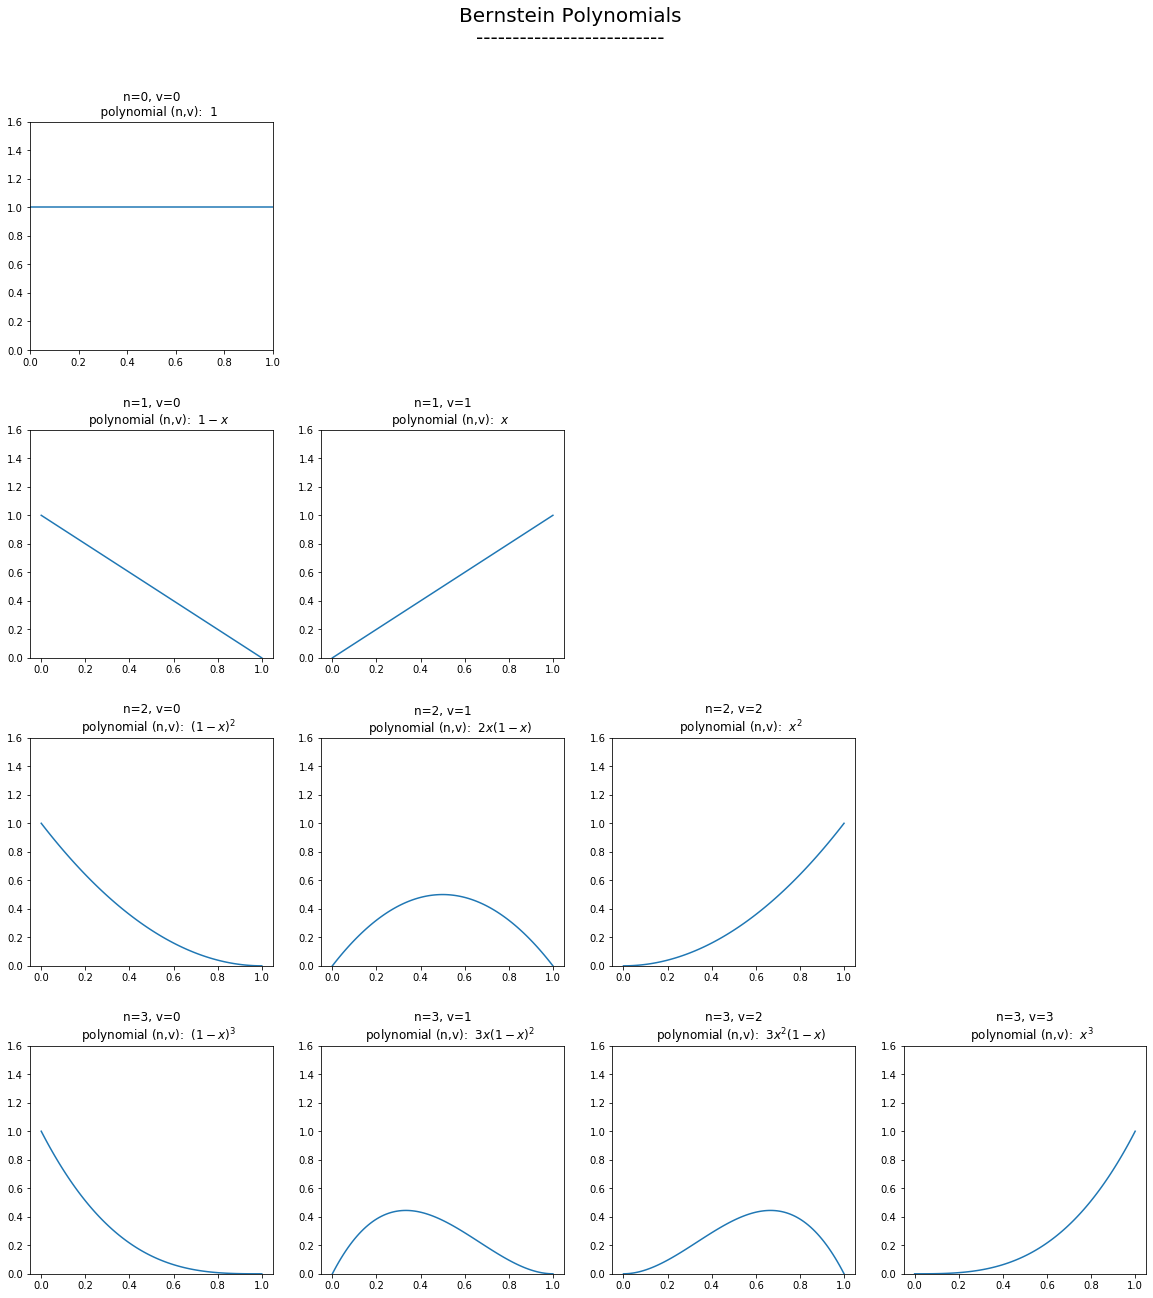

In [63]:
x = symbols("x")
x_vals = np.linspace(0, 1, 100)

fig, axes = plt.subplots(4,4,figsize=(20,20))
fig.suptitle("Bernstein Polynomials\n--------------------------",fontsize=20)
# remove all axes that are blank
for N in n_values:
    for i in range(N+1,max_v):
        axes[N,i].remove()

# run over n and exclude n=0
for n in n_values[0:]:
    for vn in range(n+1):
        if vn<=n:
            print("n =",n,"v =",vn)
            
            if n == 0 and vn == 0:
                # Need special plot since the polynomial for n=0 and v=0 since it is always 1
                axes[0,0].axhline(y=1, xmin=0.0, xmax=1.0)
                axes[0,0].set_title(f"n={n}, v={vn}\n    polynomial (n,v):  {1}")#n: {n}   v: {v}\n
                axes[0,0].set_ylim(0, 1.6)
            else:
                poly = get_Bernstein_poly(n,vn)
                lam_x = lambdify(x, poly, modules=['numpy'])
                y_vals = lam_x(x_vals)

                axes[n,vn].plot(x_vals,y_vals)

                woo = '$'+latex(poly)+'$'
                axes[n,vn].set_title(f"n={n}, v={vn}\n    polynomial (n,v):  {woo}")
                axes[n,vn].set_ylim(0, 1.6) 
        #else:
        #    print("n =",n,"v =",vn,":  not valid combo, removing subplot and moving on...")
        #    axes[n,vn].remove()


plt.subplots_adjust(bottom=0.1, right=0.9, top=0.9,wspace = 0.2, hspace = 0.35)            
plt.show()

In [81]:
from matplotlib import rcParams, cycler

n = 0 v = 0
n = 1 v = 0
n = 1 v = 1
n = 2 v = 0
n = 2 v = 1
n = 2 v = 2
n = 3 v = 0
n = 3 v = 1
n = 3 v = 2
n = 3 v = 3


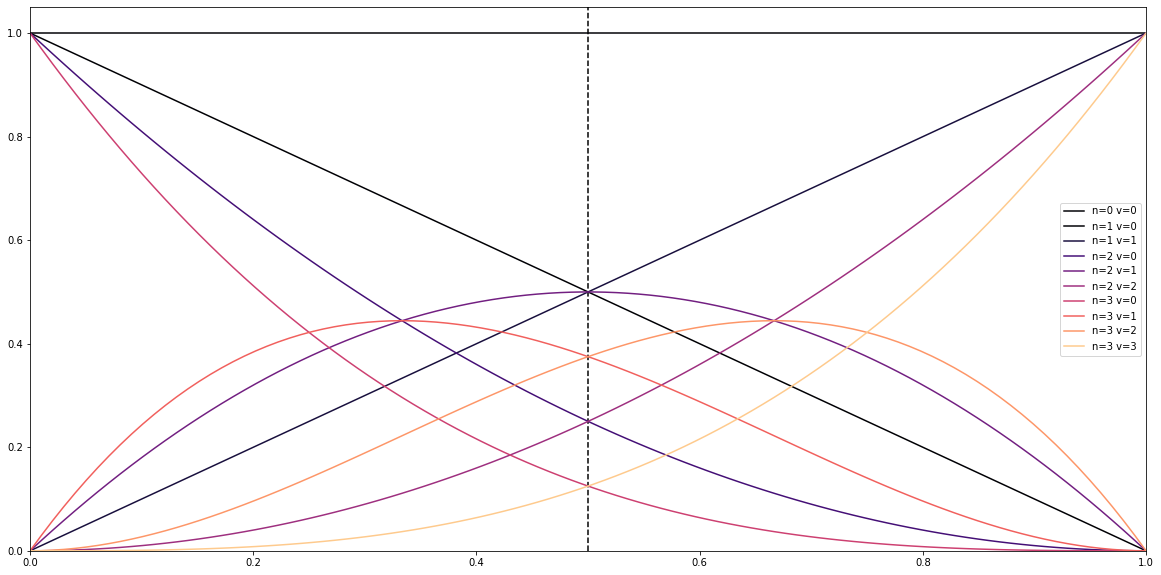

In [90]:
x = symbols("x")
x_vals = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(20,10))
ax.axvline(x=0.5, ymin=0.0, ymax=1.0,linestyle="--",color="k")
# run over n and exclude n=0
for n in n_values[0:]:
    for vn in range(n+1):
        if vn<=n:
            print("n =",n,"v =",vn)
            
            if n == 0 and vn == 0:
                # Need special plot since the polynomial for n=0 and v=0 since it is always 1
                ax.axhline(y=1, xmin=0.0, xmax=1.0,label=f'n={n} v={vn}')
                #axes.set_title(f"n={n}, v={vn}\n    polynomial (n,v):  {1}")#n: {n}   v: {v}\n
                ax.set_ylim(0, 1.05)
                ax.set_xlim(0, 1.)
            else:
                poly = get_Bernstein_poly(n,vn)
                lam_x = lambdify(x, poly, modules=['numpy'])
                y_vals = lam_x(x_vals)

                ax.plot(x_vals,y_vals,label=f'n={n} v={vn}')

                woo = '$'+latex(poly)+'$'
                
                #axes.set_title(f"n={n}, v={vn}\n    polynomial (n,v):  {woo}")
                ax.set_ylim(0, 1.05) 
                ax.set_xlim(0, 1.) 
                
#cmap = plt.cm.magma
#rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 10)))
ax.legend()
plt.show()